# Theory for analytic solution to simulation

In [1]:
#Load some modules etc
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import *
import scipy as sc
import numpy as np
init_printing()

# Without biomass variable included

## Example with 2 species

In [78]:
# Assign symbols
x_1, x_2, B_1, E_1, B_2, E_2, k, T, T_ref, T_mid = var('x_1 x_2 B_1 E_1 B_2 E_2 k T T_ref T_mid')

# Assign functions
R_1 = B_1*exp((-E_1/k)*((1/T)-(1/T_ref)))
R_2 = B_2*exp((-E_2/k)*((1/T)-(1/T_ref)))
R_E = R_1 + R_2

R_1, R_2, R_E

The following figure plots the Net Ecosystem Respiration (NER) model and its components:

In [79]:
# Assign parameter values
k_par = 8.617 * 10**-5
E_1_par = .6
E_2_par = .9
T_ref_par = 5+273.15
B_1_par = sc.exp(9.)
B_2_par = sc.exp(10.)

T_vec = 273.15+np.arange(0, 40, 0.1) #vector of temperatures
R_1_vec = np.array([R_1.evalf(subs = {E_1:E_1_par,B_1:B_1_par,T_ref:T_ref_par,k:k_par,T:temper}) for temper in T_vec])
R_2_vec = np.array([R_2.evalf(subs = {E_2:E_2_par,B_2:B_2_par,T_ref:T_ref_par,k:k_par,T:temper}) for temper in T_vec])
R_E_vec = R_1_vec + R_2_vec

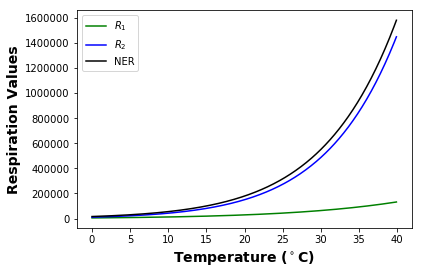

In [80]:
plt.plot(T_vec-273.15, R_1_vec.astype(float), c = 'green')
plt.plot(T_vec-273.15, R_2_vec.astype(float), c = 'blue')
plt.plot(T_vec-273.15, R_E_vec.astype(float), c = 'black')

plt.xlabel('Temperature ($^\circ$C)', fontsize=14, fontweight = 'bold')
plt.ylabel('Respiration Values', fontsize=14, fontweight = 'bold')
plt.legend(['$R_1$','$R_2$', 'NER'], fontsize=10, loc='upper left')

We can now approximate the NER temperature response by a series expansion around T_ref:

$$ln(R_E(T)) \approx ln(x_1) + ln(B_1) + ln(x_2) + ln(B_2) +(\frac{E_1}{kT_{ref}^2} + \frac{E_2}{kT_{ref}^2})(T-T_{ref})$$

and we assume that the activation energy is approximately the slope of this line (i.e. the first derivative):

$$ E_E \approx \frac{E_1*B_1 + E_2*B_2}{B_1 + B_2}$$

In [81]:
R_E_appx = log(x_1) + log(B_1) + log(x_2) + log(B_2) + ((E_1 / (k * (T_ref**2))) + (E_2 / (k * (T_ref**2))))*(T - T_ref) 

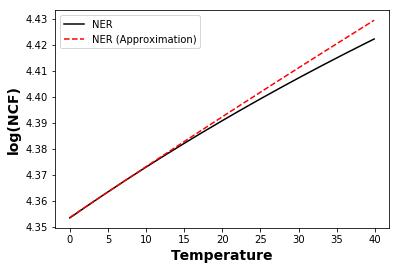

In [6]:
R_E_appx_vec = np.array([R_E_appx.evalf(subs = {x_1:x_1_par,E_1:E_1_par,B_1:B_1_par,x_2:x_2_par,E_2:E_2_par,B_2:B_2_par,T_ref:T_ref_par,k:k_par,T:temper}) for temper in T_vec])

plt.plot(T_vec-273.15, np.log(R_E_vec.astype(float)),'black')
plt.plot(T_vec-273.15, np.log(R_E_appx_vec.astype(float)),'r--')
plt.xlabel('Temperature', fontsize=14, fontweight = 'bold')
plt.ylabel('log(NCF)', fontsize=14, fontweight = 'bold')
plt.legend(['NER', 'NER (Approximation)'], fontsize=10, loc='upper left')

In [82]:
E = (B_1 * E_1 + B_2 * E_2) / (B_1 + B_2)
E.evalf(subs = {E_1:E_1_par,B_1:B_1_par,E_2:E_2_par,B_2:B_2_par})

In [83]:
import pandas as pd
import statsmodels.formula.api as smf

thing = pd.DataFrame({'R_E': sc.log(R_E_vec.astype(float)), 'temp': -1/(k_par*(T_vec.astype(float)))})
lm = smf.ols(formula = 'R_E ~ temp', data = thing).fit()
lm.params

Intercept    45.671411
temp          0.847690
dtype: float64

## Example with 5 species

In [84]:
# Assign symbols
x_3, x_4, x_5, B_3, B_4, B_5, E_3, E_4, E_5 = var('x_3 x_4 x_5 B_3 B_4 B_5 E_3 E_4 E_5')

# Assign functions
R_3 = B_3*exp((-E_3/k)*((1/T)-(1/T_ref)))
R_4 = B_4*exp((-E_4/k)*((1/T)-(1/T_ref)))
R_5 = B_5*exp((-E_5/k)*((1/T)-(1/T_ref)))
R_E = R_1 + R_2 + R_3 + R_4 + R_5

In [85]:
# Assign parameter values
E_3_par = .49
E_4_par = .54
E_5_par = .52
T_ref_par = 5+273.15
B_3_par = sc.exp(28.34)
B_4_par = sc.exp(32.97)
B_5_par = sc.exp(30.44)

T_vec = 273.15+np.arange(0, 40, 0.1) #vector of temperatures
R_3_vec = np.array([R_3.evalf(subs = {E_3:E_3_par,B_3:B_3_par,T_ref:T_ref_par,k:k_par,T:temper}) for temper in T_vec])
R_4_vec = np.array([R_4.evalf(subs = {E_4:E_4_par,B_4:B_4_par,T_ref:T_ref_par,k:k_par,T:temper}) for temper in T_vec])
R_5_vec = np.array([R_5.evalf(subs = {E_5:E_5_par,B_5:B_5_par,T_ref:T_ref_par,k:k_par,T:temper}) for temper in T_vec])
R_E_vec = R_1_vec + R_2_vec + R_3_vec + R_4_vec + R_5_vec

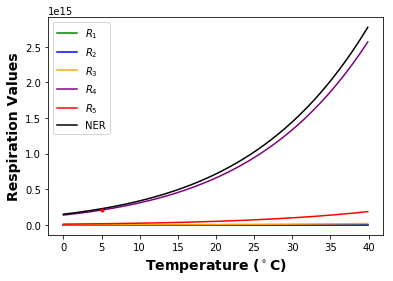

In [86]:
plt.plot(T_vec-273.15, R_1_vec.astype(float), c = 'green')
plt.plot(T_vec-273.15, R_2_vec.astype(float), c = 'blue')
plt.plot(T_vec-273.15, R_3_vec.astype(float), c = 'orange')
plt.plot(T_vec-273.15, R_4_vec.astype(float), c = 'purple')
plt.plot(T_vec-273.15, R_5_vec.astype(float), c = 'red')
plt.plot(T_vec-273.15, R_E_vec.astype(float), c = 'black')

# checking to see if my lnB0 normalization worked...it did...
plt.plot(5, B_4_par, marker='o', markersize=3, color="red")

plt.xlabel('Temperature ($^\circ$C)', fontsize=14, fontweight = 'bold')
plt.ylabel('Respiration Values', fontsize=14, fontweight = 'bold')
plt.legend(['$R_1$','$R_2$', '$R_3$', '$R_4$', '$R_5$', 'NER'], fontsize=10, loc='upper left')

In [59]:
E = (B_1 * E_1 + B_2 * E_2 + B_3 * E_3 + B_4 * E_4 + B_5 * E_5) / (B_1 + B_2 + B_3 + B_4 + B_5)
E.evalf(subs = {E_1:E_1_par,B_1:B_1_par,E_2:E_2_par,B_2:B_2_par,E_3:E_3_par,B_3:B_3_par,E_4:E_4_par,B_4:B_4_par,E_5:E_5_par,B_5:B_5_par})

In [60]:
thing = pd.DataFrame({'R_E': sc.log(R_E_vec.astype(float)), 'temp': -1/(k_par*(T_vec.astype(float)))})
lm = smf.ols(formula = 'R_E ~ temp', data = thing).fit()
lm.params

Intercept    55.509610
temp          0.538182
dtype: float64

# Adding biomass values

# Example with 2 species

In [87]:
# Assign symbols
x_1, x_2, B_1, E_1, B_2, E_2, k, T, T_ref, T_mid = var('x_1 x_2 B_1 E_1 B_2 E_2 k T T_ref T_mid')

# Assign functions
R_1 = x_1*B_1*exp((-E_1/k)*((1/T)-(1/T_ref)))
R_2 = x_2*B_2*exp((-E_2/k)*((1/T)-(1/T_ref)))
R_E = R_1 + R_2

R_1, R_2, R_E

In [88]:
# Assign parameter values
k_par = 8.617 * 10**-5
T_ref_par = 5+273.15
E_1_par = .65
E_2_par = .6
B_1_par = sc.exp(43.54)
B_2_par = sc.exp(36.99)
x_1_par = 0.98
x_2_par = 1.05

T_vec = 273.15+np.arange(0, 40, 0.1) #vector of temperatures
R_1_vec = np.array([R_1.evalf(subs = {x_1:x_1_par,E_1:E_1_par,B_1:B_1_par,T_ref:T_ref_par,k:k_par,T:temper}) for temper in T_vec])
R_2_vec = np.array([R_2.evalf(subs = {x_2:x_2_par,E_2:E_2_par,B_2:B_2_par,T_ref:T_ref_par,k:k_par,T:temper}) for temper in T_vec])
R_E_vec = R_1_vec + R_2_vec

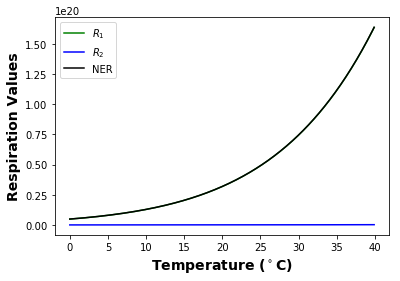

In [89]:
plt.plot(T_vec-273.15, R_1_vec.astype(float), c = 'green')
plt.plot(T_vec-273.15, R_2_vec.astype(float), c = 'blue')
plt.plot(T_vec-273.15, R_E_vec.astype(float), c = 'black')

plt.xlabel('Temperature ($^\circ$C)', fontsize=14, fontweight = 'bold')
plt.ylabel('Respiration Values', fontsize=14, fontweight = 'bold')
plt.legend(['$R_1$','$R_2$', 'NER'], fontsize=10, loc='upper left')

In [92]:
E = (B_1 * E_1 *x_1 + B_2 * E_2 * x_2) / (B_1 * x_1 + B_2 * x_2)
E.evalf(subs = {E_1:E_1_par,B_1:B_1_par,x_1:x_1_par,E_2:E_2_par,B_2:B_2_par,x_2:x_2_par})

In [91]:
thing = pd.DataFrame({'R_E': sc.log(R_E_vec.astype(float)), 'temp': -1/(k_par*(T_vec.astype(float)))})
lm = smf.ols(formula = 'R_E ~ temp', data = thing).fit()
lm.params

Intercept    70.637714
temp          0.649931
dtype: float64

## Example using 5 species

In [93]:
# Assign symbols
x_3, x_4, x_5, B_3, B_4, B_5, E_3, E_4, E_5 = var('x_3 x_4 x_5 B_3 B_4 B_5 E_3 E_4 E_5')

# Assign functions
R_3 = x_3*B_3*exp((-E_3/k)*((1/T)-(1/T_ref)))
R_4 = x_4*B_4*exp((-E_4/k)*((1/T)-(1/T_ref)))
R_5 = x_5*B_5*exp((-E_5/k)*((1/T)-(1/T_ref)))
R_E = R_1 + R_2 + R_3 + R_4 + R_5

In [94]:
# Assign parameter values
E_3_par = .42
E_4_par = .46
E_5_par = .66
B_3_par = sc.exp(22.32)
B_4_par = sc.exp(26.14)
B_5_par = sc.exp(41.66)
x_3_par = 1.05
x_4_par = 0.91
x_5_par = 0.64

T_vec = 273.15+np.arange(0, 40, 0.1) #vector of temperatures
R_3_vec = np.array([R_3.evalf(subs = {x_3:x_3_par,E_3:E_3_par,B_3:B_3_par,T_ref:T_ref_par,k:k_par,T:temper}) for temper in T_vec])
R_4_vec = np.array([R_4.evalf(subs = {x_4:x_4_par,E_4:E_4_par,B_4:B_4_par,T_ref:T_ref_par,k:k_par,T:temper}) for temper in T_vec])
R_5_vec = np.array([R_5.evalf(subs = {x_5:x_5_par,E_5:E_5_par,B_5:B_5_par,T_ref:T_ref_par,k:k_par,T:temper}) for temper in T_vec])
R_E_vec = R_1_vec + R_2_vec + R_3_vec + R_4_vec + R_5_vec

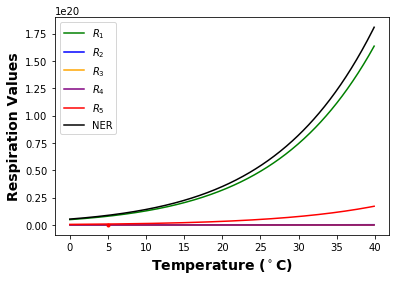

In [95]:
plt.plot(T_vec-273.15, R_1_vec.astype(float), c = 'green')
plt.plot(T_vec-273.15, R_2_vec.astype(float), c = 'blue')
plt.plot(T_vec-273.15, R_3_vec.astype(float), c = 'orange')
plt.plot(T_vec-273.15, R_4_vec.astype(float), c = 'purple')
plt.plot(T_vec-273.15, R_5_vec.astype(float), c = 'red')
plt.plot(T_vec-273.15, R_E_vec.astype(float), c = 'black')

# checking to see if my lnB0 normalization worked...it did...
plt.plot(5, B_4_par, marker='o', markersize=3, color="red")

plt.xlabel('Temperature ($^\circ$C)', fontsize=14, fontweight = 'bold')
plt.ylabel('Respiration Values', fontsize=14, fontweight = 'bold')
plt.legend(['$R_1$','$R_2$', '$R_3$', '$R_4$', '$R_5$', 'NER'], fontsize=10, loc='upper left')

In [98]:
E = (B_1 * E_1 * x_1 + x_2 * B_2 * E_2 + B_3 * x_3 * E_3 + x_4 * B_4 * E_4 + x_5 * B_5 * E_5) / (B_1 * x_1 + B_2 * x_2 + B_3 * x_3 + B_4 * x_4 + B_5 * x_5)
E.evalf(subs = {x_1:x_1_par,x_2:x_2_par,x_3:x_3_par,x_4:x_4_par,x_5:x_5_par,E_1:E_1_par,B_1:B_1_par,E_2:E_2_par,B_2:B_2_par,E_3:E_3_par,B_3:B_3_par,E_4:E_4_par,B_4:B_4_par,E_5:E_5_par,B_5:B_5_par})

In [97]:
thing = pd.DataFrame({'R_E': sc.log(R_E_vec.astype(float)), 'temp': -1/(k_par*(T_vec.astype(float)))})
lm = smf.ols(formula = 'R_E ~ temp', data = thing).fit()
lm.params

Intercept    70.771281
temp          0.650859
dtype: float64